# Intro Task, Object Localization

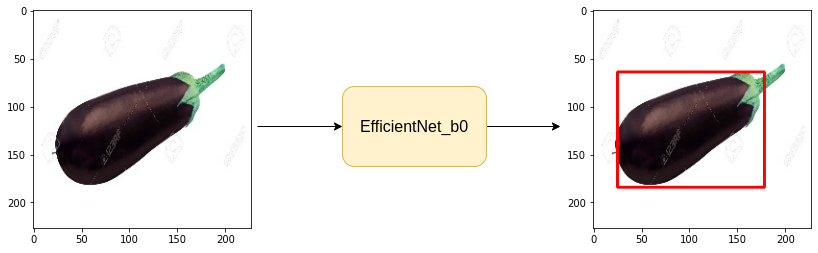

In [7]:
# install libraries/packages/modules

#!pip install -U git+https://github.com/albumentations-team/albumentations
#!pip install timm
#!pip install --upgrade opencv-contrib-python

In [2]:
# Download Dataset

!git clone https://github.com/parth1620/object-localization-dataset.git

Cloning into 'object-localization-dataset'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 203 (delta 3), reused 195 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (203/203), 2.73 MiB | 10.00 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
import sys
sys.path.append('object-localization-dataset')

# Configurations

In [5]:
CSV_FILE = 'object-localization-dataset/train.csv'
DATA_DIR = 'object-localization-dataset/'

DEVICE = 'cpu'

BATCH_SIZE = 16
IMG_SIZE = 140

LR = 0.001
EPOCHS = 40
MODEL_NAME = 'efficientnet_b0'

# number of coordinates
NUM_COR = 4

# Understand the dataset

In [6]:
# loading the data from the CSV file
df = pd.read_csv(CSV_FILE)
df

,img_path,xmin,ymin,xmax,ymax,width,height,label
0,train_images/mushroom_51.jpg,24,23,202,183,227,227,mushroom
1,train_images/eggplant_37.jpg,34,34,88,201,227,227,eggplant
2,train_images/mushroom_20.jpg,49,86,183,185,227,227,mushroom
3,train_images/eggplant_51.jpg,51,59,191,164,227,227,eggplant
4,train_images/eggplant_26.jpg,40,70,179,168,227,227,eggplant
...,...,...,...,...,...,...,...,...
181,train_images/eggplant_62.jpg,67,22,177,215,227,227,eggplant
182,train_images/cucumber_45.jpg,11,31,217,208,227,227,cucumber
183,train_images/mushroom_37.jpg,93,13,158,193,227,227,mushroom
184,train_images/eggplant_44.jpg,21,59,192,171,227,227,eggplant


In [12]:
row = df.iloc[2]
DATA_DIR + row.img_path

'object-localization-dataset/train_images/mushroom_20.jpg'

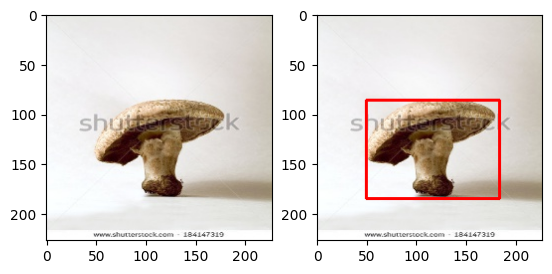

In [19]:
# selecting a row from the dataframe
row = df.iloc[2]
# using the img_path data to create the image path
img = cv2.imread(DATA_DIR + row.img_path)
# changing the color space of the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# showing only the image
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)

# extracting the points for the bounding box
pt1 = (row.xmin, row.ymin)
pt2 = (row.xmax, row.ymax)
# setting the bounding box
bnd_box_img = cv2.rectangle(img, pt1, pt2, (255, 0, 0), 2) 
# showing the image with its bounding box
ax2.imshow(bnd_box_img)

In [20]:
# Spliting the data set. Since it dataset is small (185 images), the validation set will be used for testing.

train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Augmentations

In [ ]:
import albumentations as A

# Create Custom Dataset

In [ ]:
img, bbox = trainset[6]

xmin, ymin, xmax, ymax = bbox

pt1 = (int(xmin), int(ymin))
pt2 = (int(xmax), int(ymax))

bnd_img = cv2.rectangle(img.permute(1, 2, 0).numpy(),pt1, pt2,(255,0,0),2)
plt.imshow(bnd_img)

# Load dataset into batches

In [ ]:
print("Total no. batches in trainloader : {}".format(len(trainloader)))
print("Total no. batches in validloader : {}".format(len(validloader)))

In [ ]:



print("Shape of one batch images : {}".format(images.shape))
print("Shape of one batch bboxes : {}".format(bboxes.shape))

# Create Model

In [ ]:
from torch import nn
import timm

# Create Train and Eval Function

#Training Loop

#Inference

In [ ]:
import utils